In [15]:
import numpy as np
import pandas as pd
import missingno as msno #visualisation of NaN patterns

In [16]:
#Data reading
train_data = pd.read_csv("original_data/train.csv")
test_data = pd.read_csv("original_data/test.csv")
train_data.head()
#test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#While checking the data, outlier is found

train_data[train_data["Fare"] > 300]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [18]:
test_data[test_data["Fare"] > 300]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [19]:
#change the values:
train_data["Fare"].replace({512.2392 : 7.25}, inplace = True)
test_data["Fare"].replace({512.2392 : 7.25}, inplace = True)

In [20]:
#clear NaN
train_data = train_data[(train_data.PassengerId != 259) & (train_data.PassengerId != 680) & (train_data.PassengerId != 738)]

In [21]:
#Check NaNs in train
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [22]:
#Check NaNs in test
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

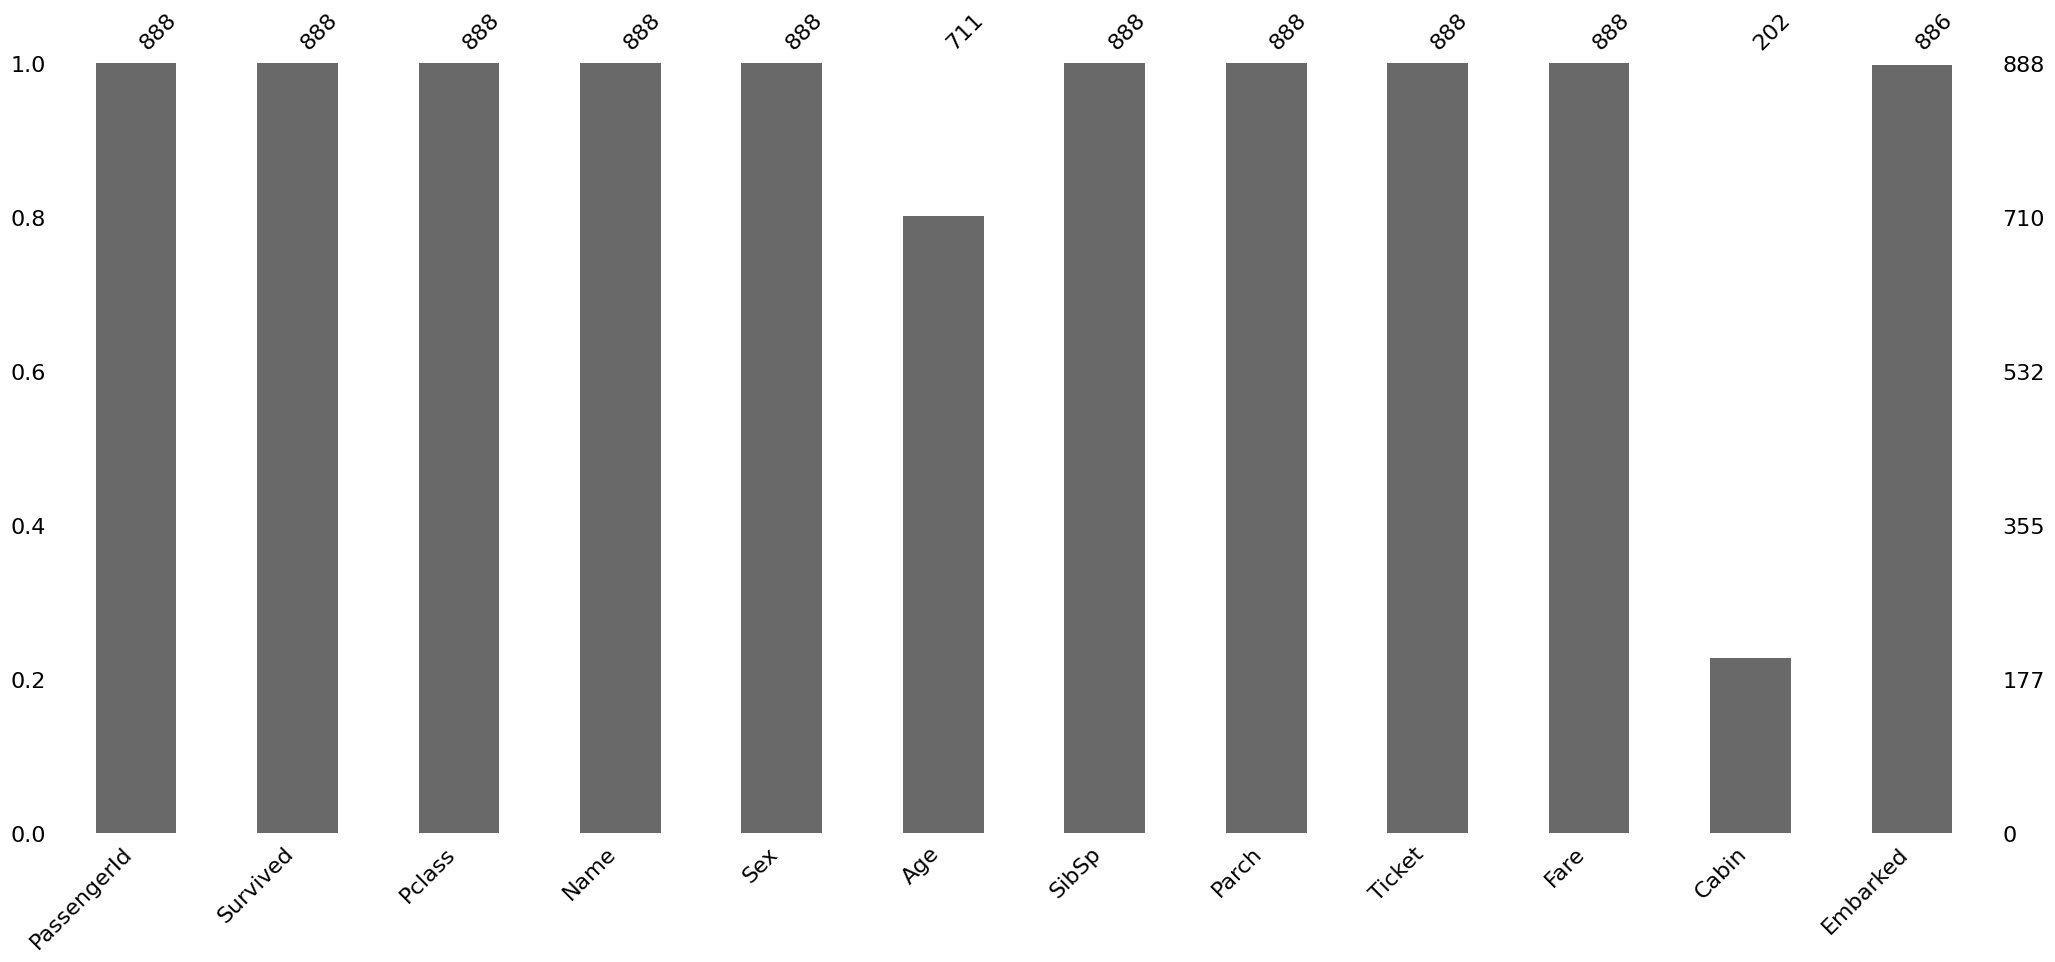

In [23]:
#visualising NaNs:
msno.bar(train_data)

In [24]:
#fixing NaNs in Age

train_data["Age"] = train_data["Age"].replace(np.nan, 29)
test_data["Age"] = test_data["Age"].replace(np.nan, 30)


In [25]:
#Too many cabin NaNs, also it's not meaningful - so we can drop the column
train_data = train_data.drop(["Cabin"], axis = 1)
test_data = test_data.drop(["Cabin"], axis = 1)


<Axes: >

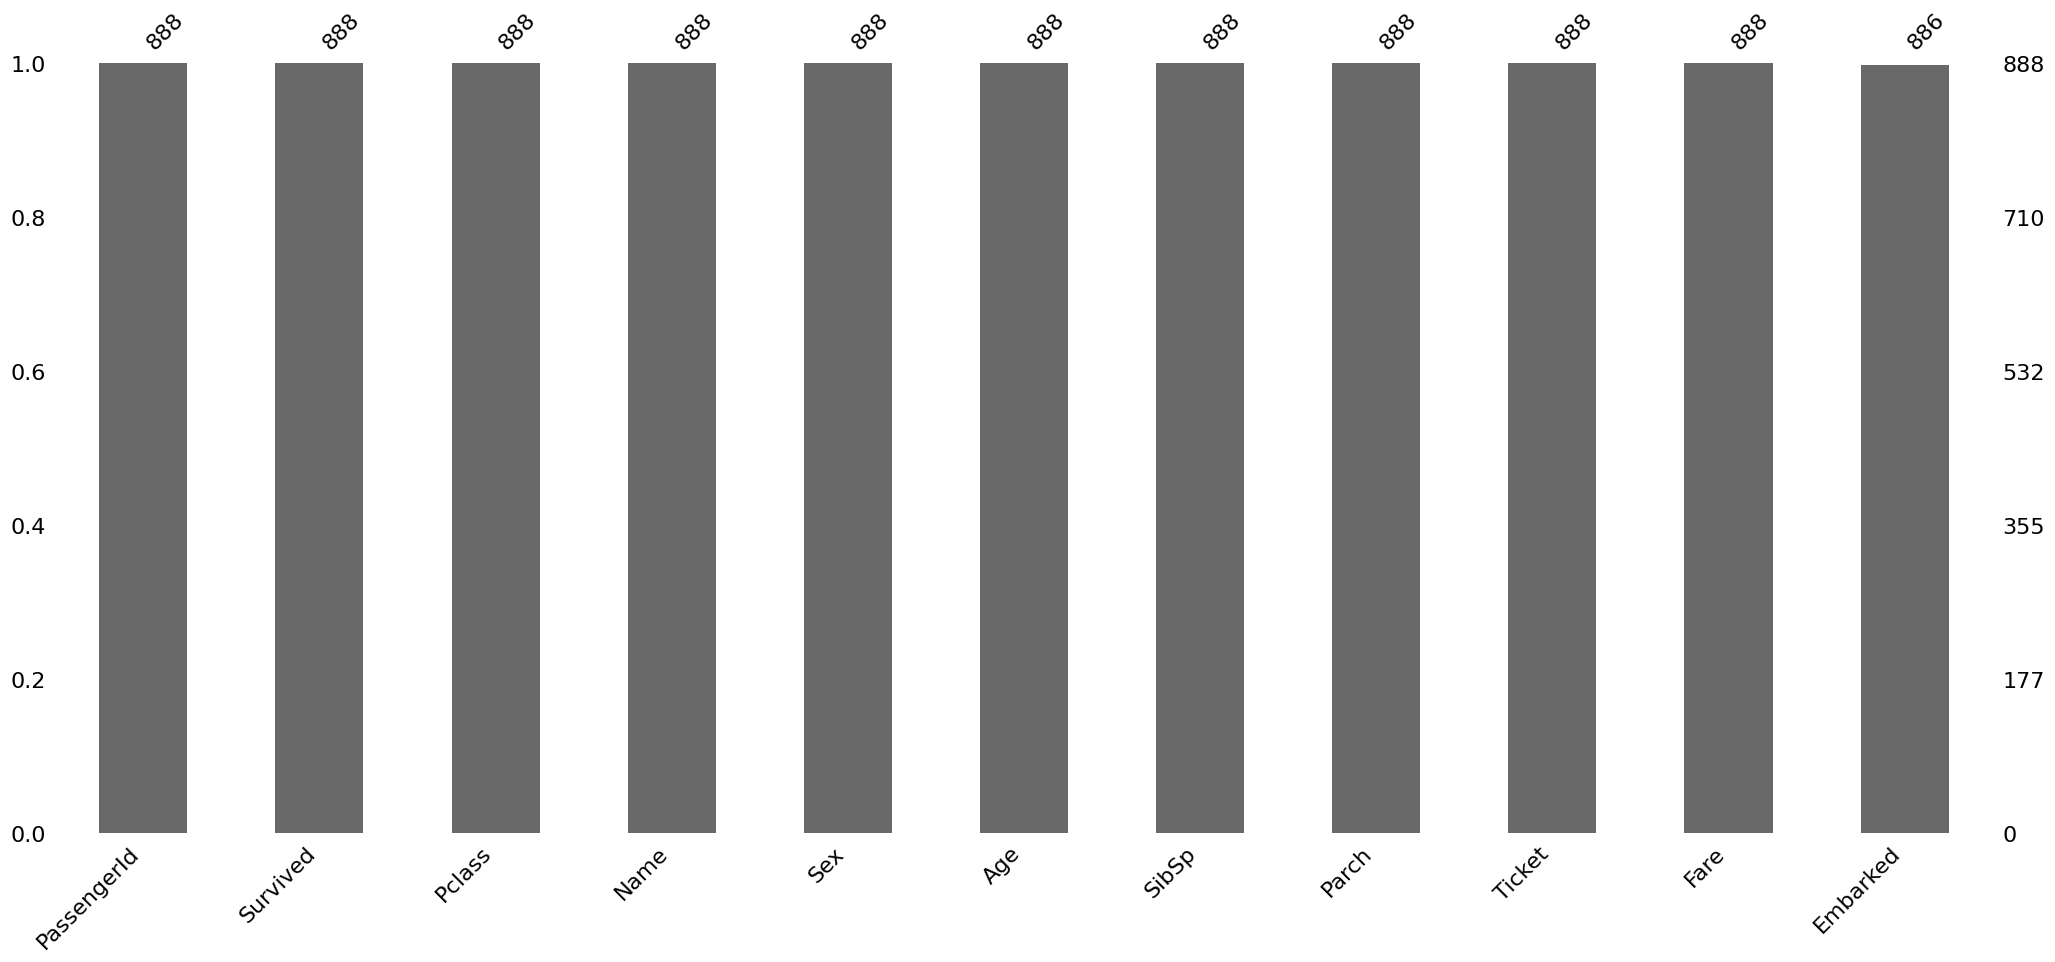

In [26]:
msno.bar(train_data)

In [27]:
#Embarkmed has 2 NaNs in the train:
train_data["Embarked"] = train_data["Embarked"].replace(np.nan, "Q")
#Mean Fare in test = 36
test_data["Fare"] = test_data["Fare"].replace(np.nan, 36.0)

In [28]:
#check if any NaNs are still there:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
#Saving my clean data
train_data.to_csv("data/cleaned_train.csv", index=False)
test_data.to_csv("data/cleaned_test.csv", index=False)